# Purpose
A company is concerned whether the predictions from a linear regression model are valid.

I aim to show why the predictions from this model are, or are not, reliable.

In [2]:

a <- c(99578,0.001,270690,48329,490944,0.001,882665,0.001,0.001,0.001,0.001,1844303)
b <- c(860403,4604,145154,51082,186943,108519,170585,18413,913413,186539,16230,2095601)
c <- c(92723,17993,112082,14738,94995,309410,132025,1712,113215,11581,9743,603188)

sums <- a + b + c
logs <- log(sums)



In [3]:
actual <- log(c(462013,8490,162011,35710,404995,236036,263045,25134,310185,128922,5420,1587600))

In [7]:
model  <- lm(actual ~ logs)

In [5]:
summary(model)


Call:
lm(formula = actual ~ logs)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82895 -0.26784 -0.07224  0.34049  0.94216 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.01628    1.08762  -0.015    0.988    
logs         0.92900    0.08585  10.821 7.68e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5059 on 10 degrees of freedom
Multiple R-squared:  0.9213,	Adjusted R-squared:  0.9134 
F-statistic: 117.1 on 1 and 10 DF,  p-value: 7.679e-07


In [6]:
model  <- lm(actual ~ log(a) + log(b) + log(c))

In [110]:
summary(model)


Call:
lm(formula = actual ~ log(a) + log(b) + log(c))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.13211 -0.27537 -0.04267  0.38434  0.74228 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.03671    1.52411   0.680  0.51557   
log(a)       0.01656    0.02165   0.765  0.46618   
log(b)       0.67661    0.15257   4.435  0.00218 **
log(c)       0.24478    0.16447   1.488  0.17499   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6202 on 8 degrees of freedom
Multiple R-squared:  0.9054,	Adjusted R-squared:  0.8699 
F-statistic: 25.53 on 3 and 8 DF,  p-value: 0.0001894


In [8]:
residuals <- model$residuals


The predictions of a linear regression model are reliable if these three things are true.

* The mean of errors is zero
* Variance in the error of a prediction, is not influenced by the magnitude of the prediction
* The error terms are normally distributed

# The mean of errors is zero

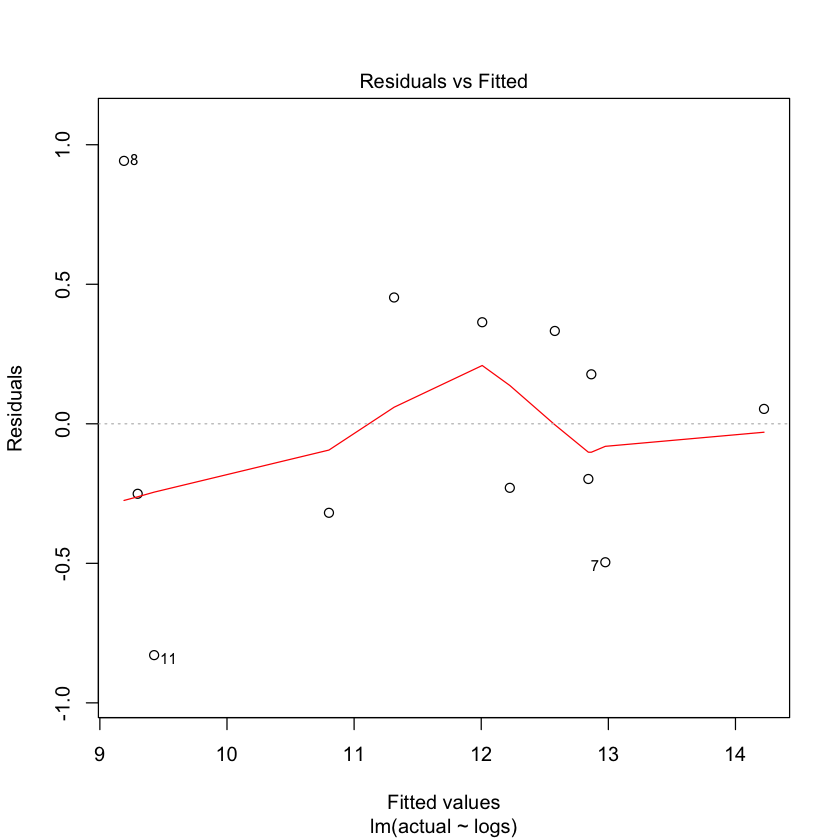

In [9]:
plot(model,which = 1)


In [98]:
t.test(residuals)


	One Sample t-test

data:  residuals
t = -2.386e-16, df = 11, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.3360415  0.3360415
sample estimates:
    mean of x 
-3.642919e-17 


This shows that the mean of the errors is statistically similar to zero.

# magnitude of the error not influenced by the magnitude of the prediction

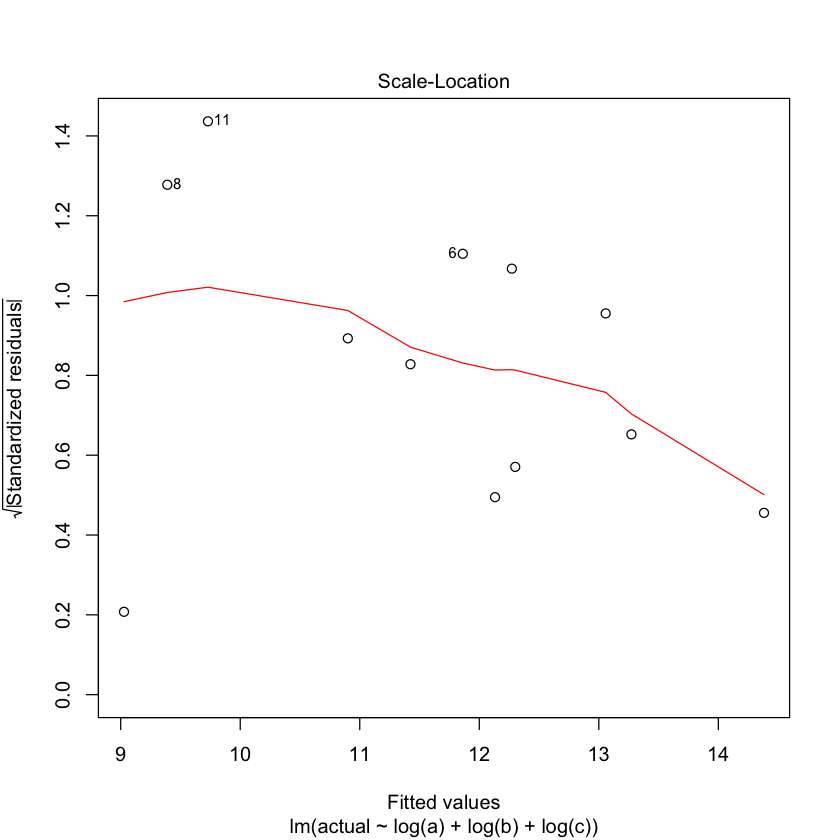

In [99]:
plot(model,which = 3)

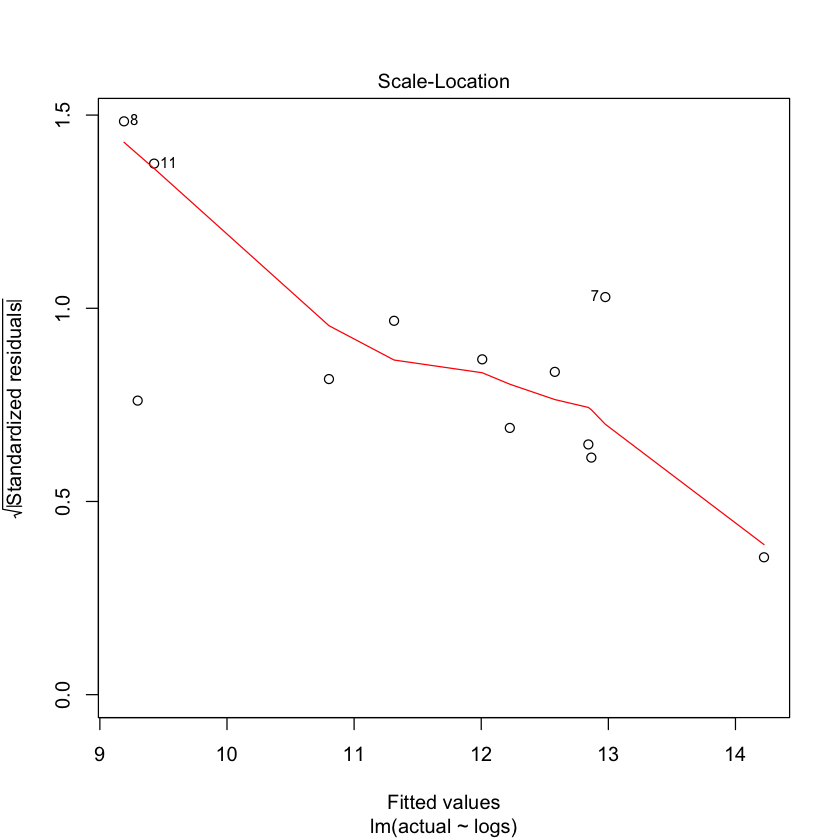

In [10]:
plot(model,which = 3)

In [100]:
library(lmtest)
bptest(actual ~ logs)


	studentized Breusch-Pagan test

data:  actual ~ logs
BP = 5.3601, df = 1, p-value = 0.0206


This p-value can be interpreted as the probability of the null hypothesis, that the error terms are homoskedastic, being true is so low that it is scensible to reject it.  

In [86]:
bptest(actual ~ log(a) + log(b) + log(c))


	studentized Breusch-Pagan test

data:  actual ~ log(a) + log(b) + log(c)
BP = 3.2213, df = 3, p-value = 0.3587


# The error terms are normally distributed

[1] 11  8

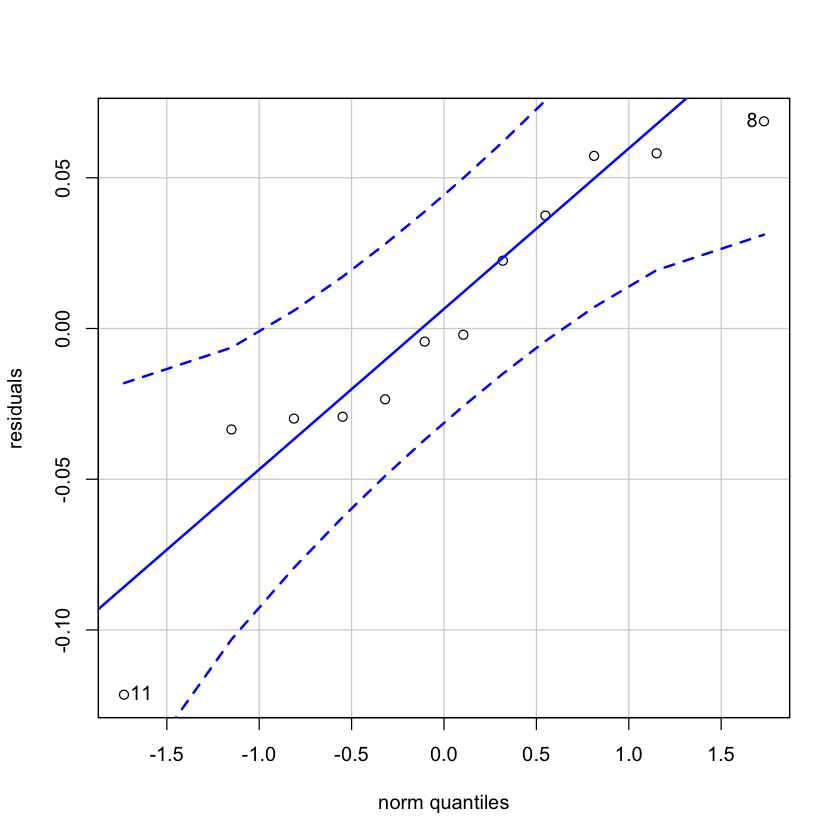

In [77]:
library("car")
qqPlot(x=residuals)

In [69]:
shapiro.test(residuals)


	Shapiro-Wilk normality test

data:  residuals
W = 0.91715, p-value = 0.2631


# Conclusion

Predictions are reliable if the error terms at low predictions can be handled.

In [70]:
summary(model)


Call:
lm(formula = log(actual) ~ log(a) + log(b) + log(c))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121470 -0.029424 -0.003219  0.042411  0.068720 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.503544   0.154186   9.751 1.02e-05 ***
log(a)      0.001554   0.002190   0.709  0.49823    
log(b)      0.062041   0.015435   4.020  0.00384 ** 
log(c)      0.019458   0.016639   1.169  0.27589    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06274 on 8 degrees of freedom
Multiple R-squared:  0.8817,	Adjusted R-squared:  0.8373 
F-statistic: 19.87 on 3 and 8 DF,  p-value: 0.0004589
